# DATA522 Final Exploration

In [171]:
# Install libraries for reading in Parquet and OCR
%pip install pyarrow
%pip install ocrmac
# %pip install pytesseract
%pip install easyocr

# Pre-trained sentiment analysis model
%pip install transformers

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 30.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [transformers] [transformers]ub]
Note: you may need to restart the kernel to use updated packages.


In [98]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import easyocr
from ocrmac import ocrmac
import cv2
import PIL

In [50]:
# Get all data Parquets
training_filenames = [
    filename for filename in os.listdir('./data') if filename[-3:] != '.md'
]
training_parquets = [
    pd.read_parquet(f'data/{filename}').drop(columns = ['caption']) for filename in training_filenames[:1]
]

In [74]:
state_easyocr = {
    "reader": easyocr.Reader(['en'])
}

In [166]:
def bytes2cv2(image):
    img_bytes = image['bytes']
    return cv2.imdecode(
        np.frombuffer(
            img_bytes, 
            np.uint8
        ),
        cv2.IMREAD_COLOR_RGB
    )
# https://stackoverflow.com/questions/17170752/python-opencv-load-image-from-byte-string
def imshow(image):
    decoded_image = bytes2cv2(image)
    plt.imshow(decoded_image)

In [85]:
def easyocr_filtertext(read_text):
    return ' '.join(read_text).upper()
def ocr_easyocr(image, state):
    decoded_image = bytes2cv2(image)
    return easyocr_filtertext(state['reader'].readtext(decoded_image, detail = 0))

In [114]:
def ocr_ocrmac(image, state):
    return ' '.join(
        [
            ocr_tuple[0] 
            for ocr_tuple 
            in ocrmac.text_from_image(
                PIL.Image.fromarray(
                    bytes2cv2(image)
                )
            )
        ]
    )

THEY WON'T SELL ME A KITE THEY SAY ILL JUST GET IT CAUGHT IN A TREE
THEY WON'T SELL ME A KITE... THEY SAY I'LL JUST GET IT CAUGHT IN A TREE..


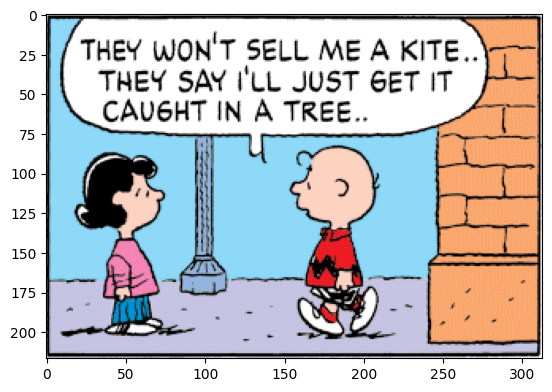

In [169]:
image = training_parquets[0][training_parquets[0].panel_name == "19960310_06"].iloc[0].image
imshow(image)
print(ocr_easyocr(image, state_easyocr))
print(ocr_ocrmac(image, {}))

In [153]:
training_parquets[0][training_parquets[0].panel_name == "19960310_06"].image

8732    {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
Name: image, dtype: object